# Election Anomalies

initilize project files and libraries

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

maj2016: pd.DataFrame = pd.read_csv("data/2016/2016_parliamentary_round_1_majoritarian.csv")
prop2016: pd.DataFrame = pd.read_csv("data/2016/2016_parliamentary_round_1_proportional.csv")
data2016: pd.DataFrame = maj2016.append(prop2016) # data holds the same columns and the same year information, uniting makes it easier to 

data2018: pd.DataFrame = pd.read_csv("data/2018/2018_presidential_round_1_proportional.csv")

maj2020: pd.DataFrame = pd.read_csv("data/2020/2020_parliamentary_round_1_majoritarian.csv")
prop2020: pd.DataFrame = pd.read_csv("data/2020/2020_parliamentary_round_1_proportional.csv")
data2020: pd.DataFrame = maj2020.append(prop2020)

data2021: pd.DataFrame = pd.read_excel("data/2021/2021.xlsx")

check data

In [420]:
data2016.head()

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”
0,41.570394,41.633551,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,თხილნარის მეურნეობა,სკოლის შენობა,ს.თხილნარი,NaN,https://archiveresults.cec.gov.ge/results/2016...,72,...,10,3,8.0,4.0,23.0,98.0,182.0,19.0,14,NaN
1,41.777929,44.820185,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#80 ბაგა ბაღი,თემქის დას. 3 მკრ. 2 კვარტ.,NaN,https://archiveresults.cec.gov.ge/results/2016...,19,...,32,3,33.0,34.0,NaN,258.0,141.0,NaN,73,NaN
2,41.646424,41.631763,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,#2 საჯარო სკოლა,ხ. ახვლედიანის (ყოფ ი ჯინჭარაძის ქ.) #19,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,29,3,16.0,15.0,36.0,300.0,133.0,47.0,191,NaN
3,41.999416,43.584695,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ხაშური,ბაგა-ბაღის შენობაN3,ხეთაგურის N10,NaN,https://archiveresults.cec.gov.ge/results/2016...,43,...,20,4,17.0,16.0,11.0,110.0,95.0,49.0,350,NaN
4,41.671687,44.914273,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#131-ე საჯარო სკოლა,ჭიჭინაძის ქ. 12,NaN,https://archiveresults.cec.gov.ge/results/2016...,13,...,31,3,18.0,48.0,17.0,281.0,133.0,54.0,43,NaN


In [421]:
data2018.head()

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other
0,41.614424,43.882007,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ბერთას,სკოლის შენობა,სოფ. ბერთა,NaN,https://archiveresults.cec.gov.ge/results/2018...,25,...,3,3,3,4,12,1,0,21,19,5
1,42.165575,42.350676,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ქალაქი,მე-11 საჯარო სკოლა,თელიას ქ #4,NaN,https://archiveresults.cec.gov.ge/results/2018...,54,...,3,7,3,20,36,2,6,127,171,17
2,42.390882,41.805339,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ხამისკური,საჯარო სკოლის შენობა,სოფ.ხამისკური,NaN,https://archiveresults.cec.gov.ge/results/2018...,66,...,3,17,2,9,76,36,2,218,213,42
3,42.320007,43.432911,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,მოხვის საარჩევნო უბანი,მოხვის საჯარო სკოლის შენობა,სოფ. მოხვა,NaN,https://archiveresults.cec.gov.ge/results/2018...,50,...,3,1,3,0,57,2,0,98,12,5
4,41.725762,44.739036,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,NaN,N83 ბაგა ბაღი,ვაჟა-ფშაველას გამზ. #49,NaN,https://archiveresults.cec.gov.ge/results/2018...,2,...,3,27,3,15,46,61,63,201,181,58


In [422]:
data2020.head()

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other,"Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi"""
0,41.578140,44.985582,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N43 საბავშვო ბაღი,მე-19 მკრ. რ-ნი,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,23,3,42.0,273,338.0,12.0,15.0,53,NaN,NaN
1,42.097682,43.228232,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,უბისის,საჯარო სკოლა,სოფ. უბისა,NaN,https://archiveresults.cec.gov.ge/results/2020...,20,...,13,3,7.0,121,57.0,3.0,10.0,3,NaN,NaN
2,41.695960,44.861824,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,157-ე საჯარო სკოლა,ვარკეთილის 4 მიკრო რაიონი 3 კვარტალი,NaN,https://archiveresults.cec.gov.ge/results/2020...,4,...,41,3,NaN,287,280.0,25.0,NaN,181,NaN,NaN
3,42.342824,42.994507,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ძველი ტყიბულის მესამე საარჩევნო უბანი,ტყიბულის № 1 საჯარო სკოლის შენობა,"ტყიბული, ვაჟა-ფშაველას ქ №1",NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,12,3,49.0,217,130.0,26.0,10.0,56,NaN,NaN
4,42.141334,42.988948,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,#37 ს/უბ (არგვეთა),არგვეთის N34 საბავშვო ბაღი,არგვეთა მე-15 ქN1,NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,22,3,61.0,310,189.0,16.0,22.0,32,NaN,NaN


In [423]:
data2021.head()

,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
0,1,1 მთაწმინდა,1.01,0,proportional,0,0,1338,20,668,...,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576
1,1,1 მთაწმინდა,1.01,0,majoritarian,0,0,1338,31,668,...,NaN,77.0,88.0,NaN,237.0,98.0,37.0,1350,49.481481,0.446576
2,1,1 მთაწმინდა,1.01,0,mayor,0,0,1338,17,668,...,230.0,12.0,77.0,NaN,269.0,NaN,31.0,1350,49.481481,0.446576
3,1,1 მთაწმინდა,1.02,0,proportional,0,0,1270,15,639,...,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413
4,1,1 მთაწმინდა,1.02,0,majoritarian,0,0,1270,24,639,...,NaN,83.0,54.0,NaN,282.0,100.0,31.0,1283,49.805144,0.424413


# Start Preprocessing

#### Fill null values

Null values exist only in votes categories, this means that number of votes for that party is very small and the data is integretaed in 'Other' column.
For this reason, null values should be filled with 0.

In [424]:
data2016 = data2016.fillna(0, axis=1)
data2018 = data2018.fillna(0, axis=1)
data2020 = data2020.fillna(0, axis=1)
data2021 = data2021.fillna(0, axis=1)

#### modify column names

Rename party columns, like in 2021 data (CAND'*number*') and add other candidates data in 2021

In [425]:
def renameCandColumns(data: pd.DataFrame) -> pd.DataFrame:
    mapper: dict = dict()

    for column in data.columns:
        if 'Party' in column:
            firstIndex: int = 9     # index where candidate number starts at
            lastIndex: int = column.index('|', firstIndex) - 1
            newName: str = f'CAND{column[firstIndex : lastIndex]}'
            newName = 'Other' if newName == 'CAND999' else newName
            mapper[column] = newName

    data = data.rename(columns=mapper)
    return data

In [426]:
data2016 = renameCandColumns(data2016)
data2018 = renameCandColumns(data2018)
data2020 = renameCandColumns(data2020)

data2021['Other'] = data2021['total_votes'] - data2021.iloc[:, -7 :].sum(axis=1) # sum of every party column

#### Check data

In [427]:
data2016.head()

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,CAND1,CAND27,CAND3,CAND41,CAND5,CAND8,Other,CAND10
0,41.570394,41.633551,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,თხილნარის მეურნეობა,სკოლის შენობა,ს.თხილნარი,0.0,https://archiveresults.cec.gov.ge/results/2016...,72,...,10,3,8.0,4.0,23.0,98.0,182.0,19.0,14,0.0
1,41.777929,44.820185,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,0,#80 ბაგა ბაღი,თემქის დას. 3 მკრ. 2 კვარტ.,0.0,https://archiveresults.cec.gov.ge/results/2016...,19,...,32,3,33.0,34.0,0.0,258.0,141.0,0.0,73,0.0
2,41.646424,41.631763,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,#2 საჯარო სკოლა,ხ. ახვლედიანის (ყოფ ი ჯინჭარაძის ქ.) #19,0.0,https://archiveresults.cec.gov.ge/results/2016...,69,...,29,3,16.0,15.0,36.0,300.0,133.0,47.0,191,0.0
3,41.999416,43.584695,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ხაშური,ბაგა-ბაღის შენობაN3,ხეთაგურის N10,0.0,https://archiveresults.cec.gov.ge/results/2016...,43,...,20,4,17.0,16.0,11.0,110.0,95.0,49.0,350,0.0
4,41.671687,44.914273,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,0,#131-ე საჯარო სკოლა,ჭიჭინაძის ქ. 12,0.0,https://archiveresults.cec.gov.ge/results/2016...,13,...,31,3,18.0,48.0,17.0,281.0,133.0,54.0,43,0.0


In [428]:
data2018.head()

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,CAND10,CAND2,CAND25,CAND36,CAND48,CAND5,Other
0,41.614424,43.882007,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ბერთას,სკოლის შენობა,სოფ. ბერთა,0.0,https://archiveresults.cec.gov.ge/results/2018...,25,...,3,3,3,4,12,1,0,21,19,5
1,42.165575,42.350676,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ქალაქი,მე-11 საჯარო სკოლა,თელიას ქ #4,0.0,https://archiveresults.cec.gov.ge/results/2018...,54,...,3,7,3,20,36,2,6,127,171,17
2,42.390882,41.805339,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ხამისკური,საჯარო სკოლის შენობა,სოფ.ხამისკური,0.0,https://archiveresults.cec.gov.ge/results/2018...,66,...,3,17,2,9,76,36,2,218,213,42
3,42.320007,43.432911,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,მოხვის საარჩევნო უბანი,მოხვის საჯარო სკოლის შენობა,სოფ. მოხვა,0.0,https://archiveresults.cec.gov.ge/results/2018...,50,...,3,1,3,0,57,2,0,98,12,5
4,41.725762,44.739036,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,0,N83 ბაგა ბაღი,ვაჟა-ფშაველას გამზ. #49,0.0,https://archiveresults.cec.gov.ge/results/2018...,2,...,3,27,3,15,46,61,63,201,181,58


In [429]:
data2020.head()

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,CAND2,CAND41,CAND5,CAND56,CAND8,Other,CAND27,CAND36
0,41.578140,44.985582,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,0,N43 საბავშვო ბაღი,მე-19 მკრ. რ-ნი,0.0,https://archiveresults.cec.gov.ge/results/2020...,12,...,23,3,42.0,273,338.0,12.0,15.0,53,0.0,0.0
1,42.097682,43.228232,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,უბისის,საჯარო სკოლა,სოფ. უბისა,0.0,https://archiveresults.cec.gov.ge/results/2020...,20,...,13,3,7.0,121,57.0,3.0,10.0,3,0.0,0.0
2,41.695960,44.861824,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,0,157-ე საჯარო სკოლა,ვარკეთილის 4 მიკრო რაიონი 3 კვარტალი,0.0,https://archiveresults.cec.gov.ge/results/2020...,4,...,41,3,0.0,287,280.0,25.0,0.0,181,0.0,0.0
3,42.342824,42.994507,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ძველი ტყიბულის მესამე საარჩევნო უბანი,ტყიბულის № 1 საჯარო სკოლის შენობა,"ტყიბული, ვაჟა-ფშაველას ქ №1",0.0,https://archiveresults.cec.gov.ge/results/2020...,21,...,12,3,49.0,217,130.0,26.0,10.0,56,0.0,0.0
4,42.141334,42.988948,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,#37 ს/უბ (არგვეთა),არგვეთის N34 საბავშვო ბაღი,არგვეთა მე-15 ქN1,0.0,https://archiveresults.cec.gov.ge/results/2020...,21,...,22,3,61.0,310,189.0,16.0,22.0,32,0.0,0.0


In [430]:
data2021.head()

,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,...,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,Other
0,1,1 მთაწმინდა,1.01,0,proportional,0,0,1338,20,668,...,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576,-1060.928058
1,1,1 მთაწმინდა,1.01,0,majoritarian,0,0,1338,31,668,...,77.0,88.0,0.0,237.0,98.0,37.0,1350,49.481481,0.446576,-1142.928058
2,1,1 მთაწმინდა,1.01,0,mayor,0,0,1338,17,668,...,12.0,77.0,0.0,269.0,0.0,31.0,1350,49.481481,0.446576,-1048.928058
3,1,1 მთაწმინდა,1.02,0,proportional,0,0,1270,15,639,...,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413,-1040.229557
4,1,1 მთაწმინდა,1.02,0,majoritarian,0,0,1270,24,639,...,83.0,54.0,0.0,282.0,100.0,31.0,1283,49.805144,0.424413,-1137.229557


# ML Model
#### Anomaly detection functions

In [431]:
def muAndBigSigma(X: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    mu: pd.DataFrame = np.mean(X, axis=0)
    sigma: pd.DataFrame = np.cov(X, rowvar=False)
    
    return mu, sigma

In [432]:
def pdfUsingMahalanobisDist(X: np.matrix, mu: np.matrix, sigma: np.matrix) -> np.matrix:
    distToMean: np.matrix = X - mu
    mahalanobisSquare = (distToMean * np.linalg.inv(sigma)) * distToMean.T
    mahanalobis = np.sqrt(np.diag(mahalanobisSquare))

    sigmaDetSqrt = np.sqrt(np.linalg.det(sigma))
    nFeat = X.shape[1]
    pdfLeft = 1 / (np.power(2 * np.pi, nFeat / 2.0) * sigmaDetSqrt)

    return pdfLeft * np.exp(-mahanalobis)

# Help Functions

In [433]:
def dropZeroRows(dataColumn: pd.DataFrame) -> pd.DataFrame:
    lastZero: int = 0
    for i, row in enumerate(dataColumn):
        if row != 0:
            lastZero = i
            break

    dataColumn = dataColumn.drop([i for i in range(lastZero)], axis=0)

    return dataColumn

# Get Anomalous Regions

In [434]:
data = data2021
geoDreamPerc = (100 * data['CAND41'] / data['total_votes']).fillna(0)       # zero total votes in one region
natMovemPerc = (100 * data['CAND5'] / data['total_votes']).fillna(0)
results = pd.concat([geoDreamPerc, natMovemPerc], axis=1)

muDF, sigmaDF = muAndBigSigma(results)

muDF.shape, sigmaDF.shape

((2,), (2, 2))

In [435]:
X = np.matrix(results)
mu = np.matrix(muDF)
sigma = np.matrix(sigmaDF)

pdf: np.matrix = pdfUsingMahalanobisDist(X, mu, sigma)
data['pdf'] = pdf
pdf

array([2.51035808e-04, 6.07585764e-05, 3.99622312e-04, ...,
       3.32917066e-05, 7.42841107e-05, 5.74865500e-05])

In [436]:
ephsilon = 5e-5

indexes: list[int] = []

for i, p in enumerate(pdf):
    if p < ephsilon:
        indexes.append(i)

anomalies = data.iloc[indexes, :]

# Graphs and Conclusions

##### Georgian Dreamers vote density distribution

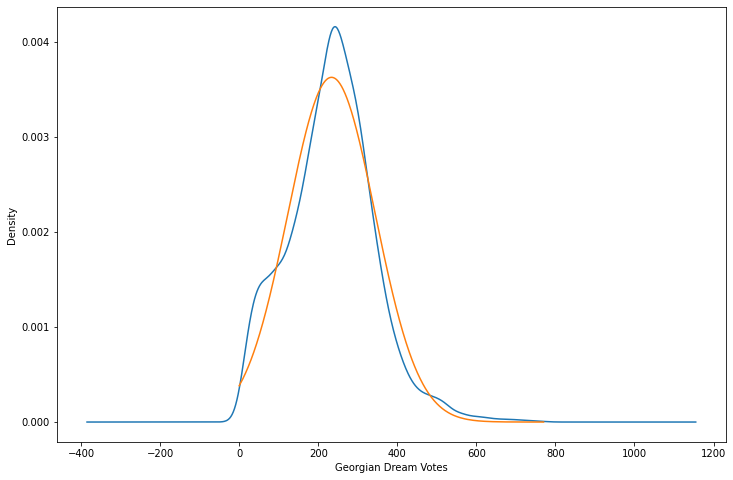

In [437]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Georgian Dream Votes')

dt = data['CAND41'].sort_values()
dt.plot.kde()
ax.plot(dt, norm.pdf(dt, dt.mean(), dt.std()))

Georgian Dreamers votes distribution seem to be pretty close to the normal distributions, we can not conclude that there is an anomalous behaviour from this graph 

##### National movement votes density distribution

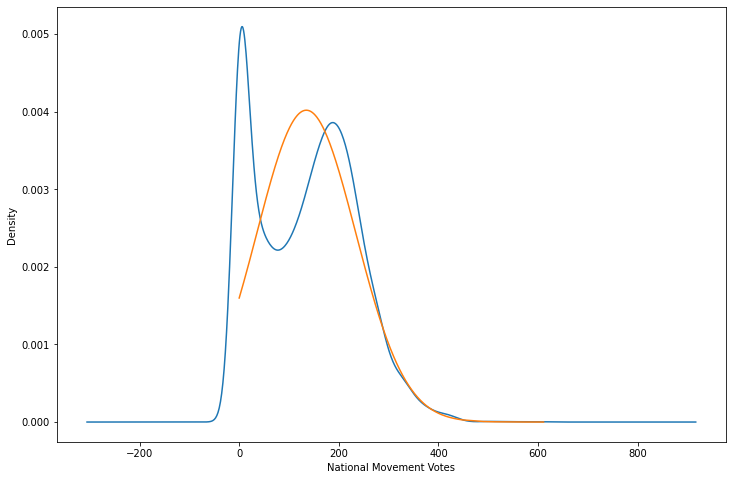

In [438]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('National Movement Votes')

dt = data['CAND5'].sort_values()
dt.plot.kde()
ax.plot(dt, norm.pdf(dt, dt.mean(), dt.std()))

While this graph seems unusual (sudden rise of density at the 0 mark), it's because National Movement did not present candidates in some regions and did not take part in majoritarian elections, that is why they have zero votes in a lot of cases.

##### National Movement density distribution without zeroes vote rows

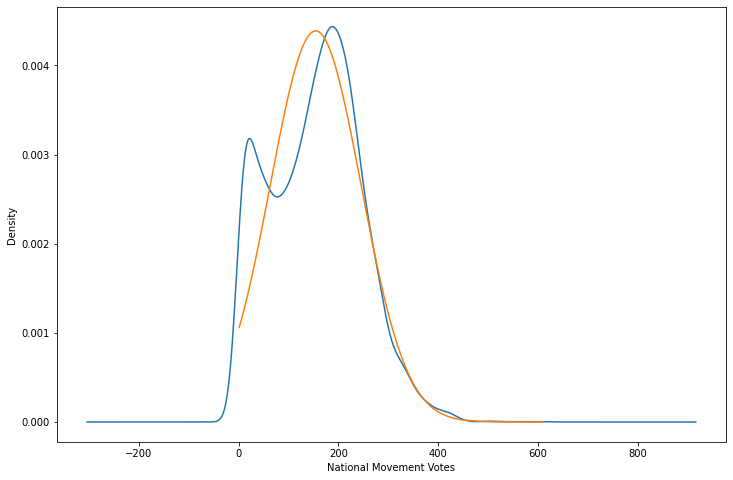

In [439]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('National Movement Votes')

dt: pd.DataFrame = data['CAND5'].sort_values().reset_index(drop=True)

dt = dropZeroRows(dt)

dt.plot.kde()
ax.plot(dt, norm.pdf(dt, dt.mean(), dt.std()))

Now the density is much closer to the normal distribution, but there is still a big surge at the begining which can be a clue to a possible anomalie

##### Georgian Dreamers and National Movement votes comparison

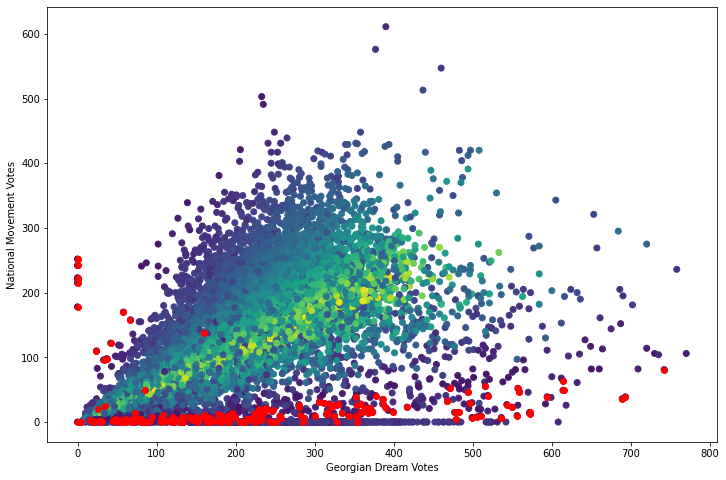

In [440]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Georgian Dream Votes')
ax.set_ylabel('National Movement Votes')

ax.scatter(data['CAND41'], data['CAND5'], c=data['pdf'])
ax.scatter(anomalies['CAND41'], anomalies['CAND5'], color='r')

As we can see from the graph, anomalies found by the algorithm (not including Nat Movement zeroes) are mostly when either of the parties have a large number of voters compared to the other one.

##### Anomalies for the Georgian Dreamers vote percentage

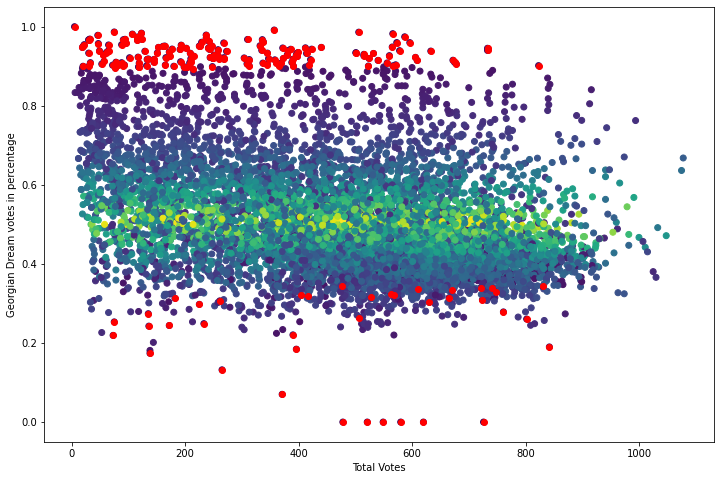

In [441]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Total Votes')
ax.set_ylabel('Georgian Dream votes in percentage')

dt = (data['CAND41'] / data['total_votes'])
ax.scatter(data['total_votes'], dt, c=data['pdf'])
ax.scatter(anomalies['total_votes'], anomalies['CAND41'] / anomalies['total_votes'], color='red')

As we can see from the graphs, most of the anomalies are where Georgian Dreameres have a high percentage of votes (with some cases of very low amount of votes)

##### Anomalies for the National Movement vote percentage

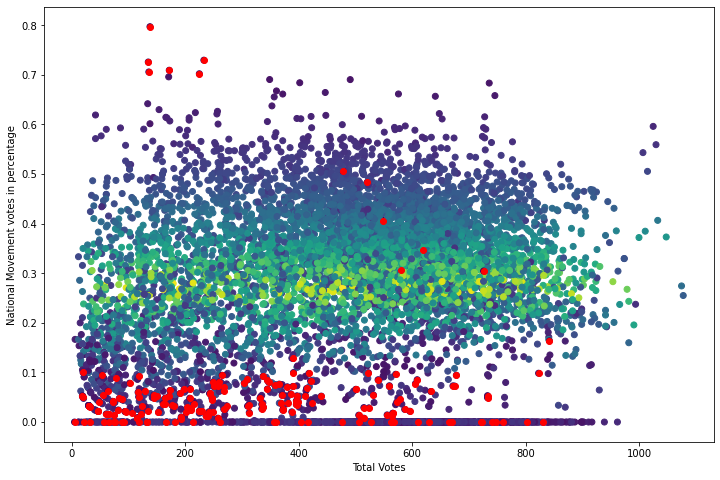

In [442]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Total Votes')
ax.set_ylabel('National Movement votes in percentage')

dt = (data['CAND5'] / data['total_votes'])
ax.scatter(data['total_votes'], dt, c=data['pdf'])
ax.scatter(anomalies['total_votes'], anomalies['CAND5'] / anomalies['total_votes'], color='red')

Contrary to previous case, the most of the anomalies for the National Movement come when they have only a few votes and a very few from when they have a high number of votes.

from this results it would seem quite possible that Georgian Dreamers committed election fraud in the majority of these cases, but it also shows than in that case National Movement also committed fraud in some cases as well.

#### Find coleration between different anomalies

In [443]:
anomalies

,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,...,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,Other,pdf
243,2,2 ვაკე,2.42,0,majoritarian,0,2,1401,36,810,...,0.0,0.0,0.0,0.0,0.0,1410,57.446809,0.466424,-1467.913233,0.000004
347,2,2 ვაკე,2.77,0,majoritarian,0,0,1602,75,840,...,91.0,298.0,209.0,0.0,53.0,1615,52.012384,0.534238,-1425.546621,0.000029
422,3,3 საბურთალო,3.23,0,majoritarian,0,0,1507,35,765,...,88.0,0.0,245.0,118.0,43.0,1520,50.328947,0.502812,-1255.831759,0.000049
428,3,3 საბურთალო,3.25,0,majoritarian,0,1,1551,38,763,...,70.0,0.0,224.0,95.0,37.0,1564,48.785166,0.517367,-1245.302533,0.000040
464,3,3 საბურთალო,3.37,0,majoritarian,0,2,1482,37,881,...,84.0,0.0,285.0,120.0,69.0,1492,59.048257,0.493549,-1195.541807,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178,26,26 თეთრიწყარო,26.43,1,mayor,1,0,0,0,20,...,0.0,0.0,18.0,0.0,0.0,21,95.238095,0.006947,-114.245042,0.000050
8198,53,53 ვანი,53.32,1,mayor,1,0,0,4,57,...,0.0,0.0,48.0,0.0,0.0,73,78.082192,0.024148,-146.106340,0.000048
8204,50,50 საჩხერე,50.58,1,mayor,1,0,0,1,31,...,0.0,0.0,29.0,0.0,0.0,68,45.588235,0.022494,-112.610730,0.000031
8227,58,58 წყალტუბო,58.68,0,proportional,1,0,0,2,67,...,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494,-163.551906,0.000036


##### Get the most anomalious districts

In [444]:
anomalies['district_alt_id'].value_counts().head()

40 ახალქალაქი    33
50 საჩხერე       32
41 ნინოწმინდა    22
22 მარნეული      16
23 ბოლნისი       12
Name: district_alt_id, dtype: int64

These 5 regions give us a lot of information. 

The second most anomalious region, Sachkhere, is a hometown of a Georgian Dreamers leader Bidzina Ivanishvili, so we can conclude that this is not a case of an election fraud, since people from those regions always havily favoured Georgian Dreamers.

Unlike Sachkhere, other 4 regions have a very similar situations, that almost guarantees election fraud. People from these regions represent ethnic minorities in Georgia. Most people from here do not even speak Georgian, aspecially in mostly Armenian populated areas of Akhalkalaki (id-40) and Ninotsminda (id-41) where even fewer ethnic majority lives than in mostly Azerbaijanian populated regions of Marneuli (id-22) and Bolnisi (id-23). For those reasons people from these regions are relativly isolated from rest of Georgia, which makes it easier for parliament majority to control them.
If we had pre-Georgian Dream election data, we could show that the previously National Movement (they were majority in the parlament before 2012) would dominate this regions.

##### Check if votes and turnout are rounded

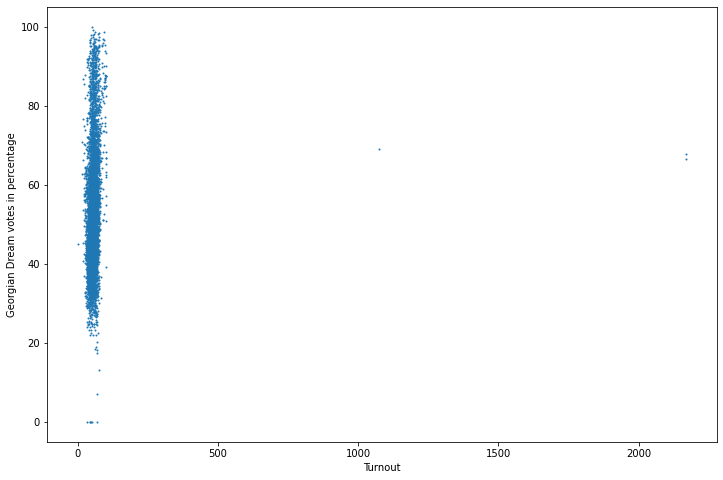

In [445]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Turnout')
ax.set_ylabel('Georgian Dream votes in percentage')

dt = (data['CAND41'] / data['total_votes'] * 100)
ax.scatter(data['turnout'], dt, s=1)

'turnout' column is working incorectly, so i will modify it a little bit. if turnout >= 100 i will set to 100

In [446]:
data.loc[data['turnout'] > 100, 'turnout'] = 100

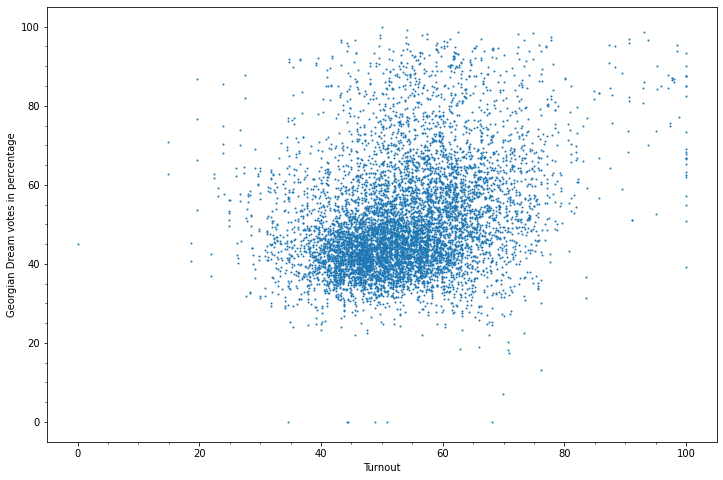

In [447]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Turnout')
ax.set_ylabel('Georgian Dream votes in percentage')
ax.set_xticks([i for i in range(0, 101, 5)], minor=True)
ax.set_yticks([i for i in range(0, 101, 5)], minor=True)

dt = (data['CAND41'] / data['total_votes'] * 100)
ax.scatter(data['turnout'], dt, s=1, )

We can see that votes are not runded like they were in russian elections

#### Compare results in different types of elections

In [448]:
major = data.query('election_type == \'majoritarian\'')
mayor = data.query('election_type == \'mayor\'')
propo = data.query('election_type == \'proportional\'')

major.shape, mayor.shape, propo.shape

((758, 26), (3737, 26), (3736, 26))

##### Compare Elections for Georgian Dream

<AxesSubplot:xlabel='Georgian Dreamers votes', ylabel='Density'>

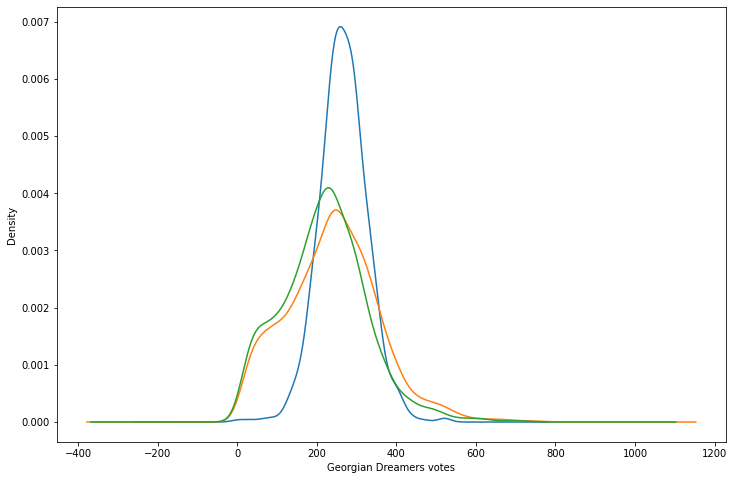

In [449]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("Georgian Dreamers votes")

major['CAND41'].sort_values().plot.kde()
mayor['CAND41'].sort_values().plot.kde()
propo['CAND41'].sort_values().plot.kde()

These graphs do not give us much information. Spike in majoritarian elections is due to absence of there biggest competators, National Movement. Other election graphs are quite similar and does not show fraud.

##### Compare elections for National Movement

<AxesSubplot:xlabel='National Movement Votes', ylabel='Density'>

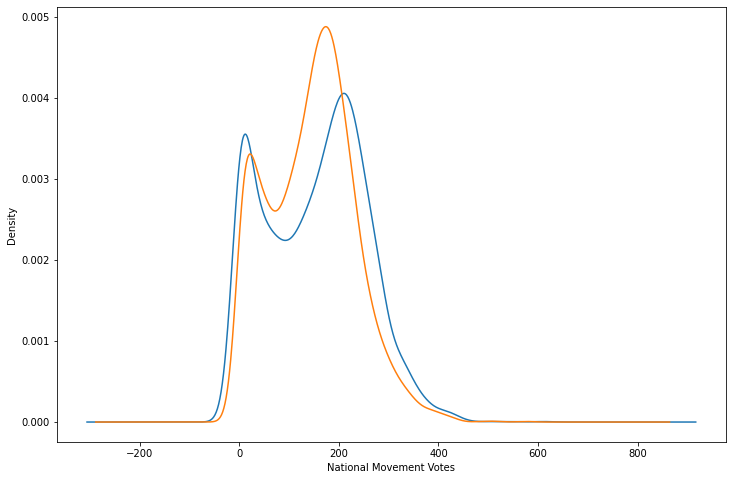

In [450]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('National Movement Votes')

# National movement did not take part in majoritarian elections
mayor['CAND5'].sort_values().plot.kde()
propo['CAND5'].sort_values().plot.kde()